In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import math
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df_600=pd.DataFrame()
df_600=pd.read_csv("600.csv")
df_fake=pd.DataFrame()
df_fake=pd.read_csv("fake_data.csv")
df_60=pd.DataFrame()
df_60=pd.read_csv("60.csv")

In [3]:
# Split the dataset into train, validation, and test sets
x_train, x_test, y_train, y_test = train_test_split(df_60, df_600, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

# Convert the data to PyTorch tensors
x_train = torch.tensor(x_train.values).float()
y_train = torch.tensor(y_train.values).float()
x_val = torch.tensor(x_val.values).float()
y_val = torch.tensor(y_val.values).float()
x_test = torch.tensor(x_test.values).float()
y_test = torch.tensor(y_test.values).float()
data_f=torch.tensor(df_fake.values).float()

In [4]:
# whether to run on GPU or CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using {device} device")
#print(torch.cuda.get_device_name(0))

Using cuda device


In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.fc1 = nn.Linear(5500, 256)
        self.fc2 = nn.Linear(256, 512)
        self.fc3 = nn.Linear(512, 1024)
        self.fc4 = nn.Linear(1024, 2048)
        self.fc5 = nn.Linear(2048, 4096)
        self.fc6 = nn.Linear(4096, 8192)
        self.fc7 = nn.Linear(8192, 16384)
        self.fc8 = nn.Linear(16384, 30720)
        self.fc9 = nn.Linear(30720, 1)

    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = nn.functional.relu(self.fc3(x))
        x = nn.functional.relu(self.fc4(x))
        x = nn.functional.relu(self.fc5(x))
        x = nn.functional.relu(self.fc6(x))
        x = nn.functional.relu(self.fc7(x))
        x = nn.functional.relu(self.fc8(x))
        x = self.fc9(x)
        x = nn.functional.sigmoid(x)
        return x


In [6]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(5500, 256)
        self.fc2 = nn.Linear(256, 512)
        self.fc3 = nn.Linear(512, 1024)
        self.fc4 = nn.Linear(1024, 2048)
        self.fc5 = nn.Linear(2048, 4096)
        self.fc6 = nn.Linear(4096, 8192)
        self.fc7 = nn.Linear(8192, 16384)
        self.fc8 = nn.Linear(16384, 30720)
        self.fc9 = nn.Linear(30720, 5500)

    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = nn.functional.relu(self.fc3(x))
        x = nn.functional.relu(self.fc4(x))
        x = nn.functional.relu(self.fc5(x))
        x = nn.functional.relu(self.fc6(x))
        x = nn.functional.relu(self.fc7(x))
        x = nn.functional.relu(self.fc8(x))
        x = self.fc9(x)
        return x

In [ ]:


'''def generate(self, num_samples):
        noise = torch.randn(num_samples, self.input_size)
        return self.generator(noise)'''

<AxesSubplot:ylabel='1'>

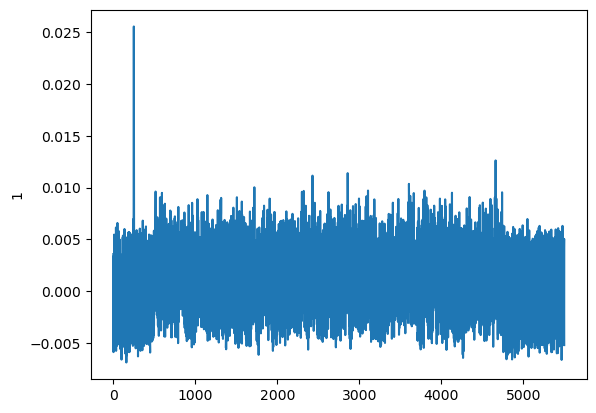

In [36]:
df=pd.DataFrame(val_outputs.numpy())
df=df.transpose()
sb.lineplot(data=df[1])


In [ ]:
discriminator_lr=0.05
generator_lr=0.05
        
generator=Generator()
discriminator=Discriminator()       
        
d_optimizer = optim.Adam(discriminator.parameters(), lr=discriminator_lr)
g_optimizer = optim.Adam(generator.parameters(), lr=generator_lr)
loss = nn.BCELoss()
        


        
        # Define the loss function and optimizer
criterion_model = nn.MSELoss()
optimizer_model = torch.optim.Adam(generator.parameters(), lr=0.05)

        # Train the model
train_losses = []
val_losses = []
d_losses = []
g_losses = []
batch_size=50
epoches=500

for epo in range(epoches):
    for i in range(0, x_train.shape[0], batch_size):
        
        # Get the batch
        batch_x = x_train[i:i+batch_size]
        batch_y = y_train[i:i+batch_size]
                    
                # Zero the parameter gradients
        optimizer_model.zero_grad()

                # Forward pass
        outputs = generator(batch_x)

                # Compute the loss
        train_loss = criterion_model(outputs, batch_y)

                # Backward pass and optimize
        train_loss.backward(retain_graph=True)
        optimizer_model.step()
        
        #Train Discriminator
        d_optimizer.zero_grad()
        real_labels = torch.ones(batch_y.size(0), 1)
        fake_labels = torch.zeros(20, 1)

        # Train discriminator on real data
        real_output = discriminator(batch_y)
        loss_real=loss(real_output, real_labels)
        real_loss =loss_real.mean().item()

        # Train discriminator on fake data generated by generator
        noise = data_f
        fake_data = noise #self.generator(noise)
        fake_output = discriminator(fake_data)
        loss_fake=loss(fake_output, fake_labels)
        fake_loss =loss_fake.mean().item()
        
        # Compute total discriminator loss and backpropagate
        total_loss = loss_real + loss_fake
        total_loss.backward()
        d_optimizer.step()
        d_losses.append(total_loss.item())
        
        #train generator
        g_optimizer.zero_grad()
        labels = torch.ones(outputs.size(0), 1)

            # Generate fake data and compute generator loss
        outputs_new = generator(batch_x)
        output = discriminator(outputs_new)
        loss_g=loss(output, labels)
        #g_loss = loss_g.mean().item()
        g_loss = loss_g.item()
    
        
# Backpropagate and update generator weights
        loss_g.backward()
        g_optimizer.step()
        g_losses.append(g_loss)   
        
        # Evaluate the model on the validation set
    with torch.no_grad():
        val_outputs = generator(x_val)
        val_loss = criterion_model(val_outputs, y_val) 
        
        train_losses.append(train_loss.item())
    val_losses.append(val_loss.item())

    print(f"Epoch {epo+1}/{epoches},Train Loss: {train_loss.item():.4f}, Val Loss: {val_loss.item():.4f}, G Loss: {loss_g.item():.4f}, D Loss: {total_loss.item():.4f}")
    
         
            
# Evaluate the model on the test set
with torch.no_grad():
    test_outputs = generator(x_test)
    test_loss = criterion_model(test_outputs, y_test)

print(f"Test Loss: {test_loss.item():.4f}")  

In [16]:
# Evaluate the model on the test set
with torch.no_grad():
    test_outputs = generator(x_test)
    test_loss = criterion_model(test_outputs, y_test)

print(f"Test Loss: {test_loss.item():.4f}") 

Test Loss: 0.0019


In [21]:
df_test=pd.DataFrame(val_outputs.numpy())
df_y = pd.DataFrame(y_test.numpy())
df_y=df_y.transpose()
df_test=df_test.transpose()

In [22]:
r2 = r2_score(df_y[0], df_test[0])
print("R2 score:", r2)

R2 score: -1.6196620349296111


<AxesSubplot:>

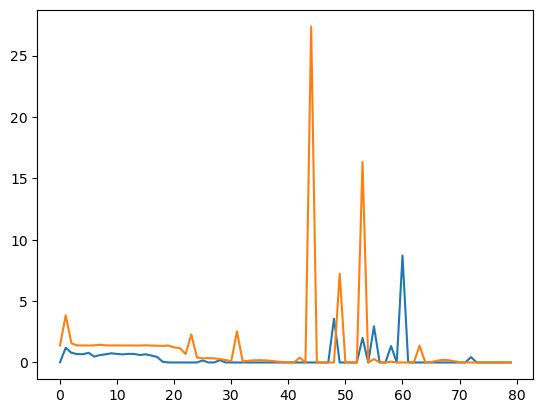

In [25]:
sb.lineplot(data=g_losses)
sb.lineplot(data=d_losses)